In [1]:
import spacy
import os
import pandas as pd
import re

In [2]:
nlp = spacy.load("en_core_web_md")

Theres a lot to filter, see [this](http://localhost:8889/tree/Documents/Uni/DH/Data%20Science/Projekte/Topic%20Modelling/corpus_base/16338845__IM-PRESS__20050826-IPR-01421__EN.txt).

In [3]:
# Define the folder path
folder_path = 'corpus_base'

# Initialize lists to store data
titles = []
categories = []
contents = []
filenames = []

date_pattern = r'\d{4}-\d{2}-\d{2} - \d{2}:\d{2}'
dates_pattern = r'\d{2}\.\d{2}\.\d{2}'
phone_pattern = r'\(\+\d*\)\s\d*\s\d*\s\d*'
mark_pattern = r'[A-Z]{4,}'
ref_pattern = r'\d+\w+\d+'
mail_pattern = r'.*\@.*\.eu'

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    # Check if file has .txt extension
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            
            # Extract title, category, and content
            title = lines[0].strip()
            category = lines[1].strip()
            content_lines = lines[2:]  # Exclude the first two lines
            
            # Remove weird stuff
            content_lines = [re.sub(r'\/\S*', '', line) for line in content_lines]
            content_lines = [re.sub(date_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(r'\*\.jpg', '', line) for line in content_lines]
            content_lines = [re.sub(phone_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(mark_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(ref_pattern, '', line) for line in content_lines]
            content_lines = [re.sub(mail_pattern, '', line) for line in content_lines]
            
            # Remove batches of 3 lines
            content_lines = [line for line in content_lines if not line.startswith((r'\d', 'LINK', 'EN'))]
            
            # Join the remaining lines to form the content
            content = ' '.join(content_lines).strip()            
            
            # Append data to lists
            titles.append(title)
            categories.append(category)
            contents.append(content)
            filenames.append(file_name)

# Create a pandas dataframe
data = {
    'title': titles,
    'category': categories,
    'content': contents,
    'filename': filenames
}

df = pd.DataFrame(data)
df

,title,category,content,filename
0,EU should cooperate more with US in Mediterran...,Development and cooperation,MEPs are disappointed with the results achieve...,16338845__IM-PRESS__20050826-IPR-01421__EN.txt
1,Broader EU-China Relations Needed,External relations,A longer-term trade strategy needs to be devis...,16338859__IM-PRESS__20050907-IPR-00044__EN.txt
2,Transport Committee demands EU-wide blacklist ...,Transport,Following a number of serious air crashes earl...,16338887__IM-PRESS__20050907-IPR-00050__EN.txt
3,Compliance with Hague tribunal is key to acces...,External relations,Speaking to the Foreign Affairs Committee on 3...,16338915__IM-PRESS__20050907-IPR-00048__EN.txt
4,"Commissioner Rehn defends ""rigorous"" framework...",External relations,Appearing before the Foreign Affairs Committee...,16338929__IM-PRESS__20050826-IPR-01417__EN.txt
...,...,...,...,...
7241,Basic rights for crime victims across the EU,Judicial cooperation,"Committees Civil Liberties, Justice and Home A...",33730400__IM-PRESS__20120326-IPR-41845__EN.txt
7242,Mobile roaming: MEPs win deal with Council to ...,Information society,"Committees Industry, Research and Energy\n \n ...",33732813__IM-PRESS__20120326-IPR-41842__EN.txt
7243,Opening: President Schulz condemns Toulouse ki...,Institutions,Plenary sittings\n \n The recent callous and ...,33734304__IM-PRESS__20120328-IPR-42022__EN.txt
7244,Food aid for needy beyond 2013: Commission fol...,Agriculture,Plenary sittings\n \n In times of economic cr...,33735269__IM-PRESS__20120327-IPR-41991__EN.txt


In [4]:
stopwords = nlp.Defaults.stop_words|{'%', '.', "?", "!", ",", "(", ")", ":", ";", "\"", "'", "=", "-", "--en", "http", "v0", "xml", "im-", "doc", "avi"}
stoptags = ['ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NUM', 'PART', 'PRON', 'PUNCT', 'SCONJ', 'SYM', 'SPACE']

In [5]:
df["tokens"] = df.content.apply(lambda x: [t.lemma_.lower() for t in nlp(x, disable=["parser", "ner"]) if (t.text.strip() != "" and (t.text.lower() not in stopwords) and t.pos_ not in stoptags)])

In [6]:
df.iloc[356].tokens

['united',
 'kingdom',
 'hastings',
 'beach',
 'january',
 'month',
 'think',
 'take',
 'dip',
 'sea',
 'dream',
 'summer',
 'holiday',
 'recognise',
 'bathe',
 'beach',
 'eu',
 'thank',
 'european',
 'bathing',
 'water',
 'directive',
 'system',
 'place',
 'minimum',
 'standard',
 'cleanliness',
 'water',
 'swim',
 'information',
 'help',
 'choose',
 'beach',
 'bathe',
 'mep',
 'vote',
 'revise',
 'directive',
 'update',
 'rule',
 'raise',
 'standard',
 'improve',
 'information',
 'public',
 'vote',
 'place',
 'strasbourg',
 'january',
 'text',
 'agree',
 'delegation',
 'mep',
 'environment',
 'ministers',
 'eu',
 'member',
 'states',
 'new',
 'directive',
 'come',
 'effect',
 'figure',
 'european',
 'commission',
 'show',
 'uk',
 'coastal',
 'bathing',
 'water',
 'meet',
 'minimum',
 'quality',
 'criterion',
 'set',
 'directive',
 'slight',
 'fall',
 'number',
 'progress',
 'meet',
 'directive',
 'stringent',
 'voluntary',
 'standard',
 'dramatic',
 'environment',
 'agency',
 'englan

In [7]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)

l = list(dictionary.items())
print(len(l))
print(l)

14523
[(0, 'achieve'), (1, 'action'), (2, 'add'), (3, 'adult'), (4, 'advisable'), (5, 'affairs'), (6, 'algeria'), (7, 'american'), (8, 'anneli'), (9, 'appear'), (10, 'approach'), (11, 'authority'), (12, 'bilateral'), (13, 'chair'), (14, 'change'), (15, 'cooperation'), (16, 'creation'), (17, 'de'), (18, 'declaration'), (19, 'dialogue'), (20, 'dimension'), (21, 'disappoint'), (22, 'disappointed'), (23, 'disappointment'), (24, 'document'), (25, 'economic'), (26, 'ed'), (27, 'education'), (28, 'egypt'), (29, 'elmar'), (30, 'emma'), (31, 'epp'), (32, 'euro'), (33, 'euromed'), (34, 'expert'), (35, 'explain'), (36, 'fi'), (37, 'field'), (38, 'follow'), (39, 'foreign'), (40, 'form'), (41, 'fr'), (42, 'global'), (43, 'greens'), (44, 'group'), (45, 'hearing'), (46, 'hold'), (47, 'hope'), (48, 'huge'), (49, 'human'), (50, 'hélène'), (51, 'identity'), (52, 'immigration'), (53, 'improvement'), (54, 'initiative'), (55, 'institute'), (56, 'international'), (57, 'israel'), (58, 'issue'), (59, 'jordan'

In [8]:
corpus = [dictionary.doc2bow(a) for a in df['tokens']]

In [9]:
from gensim.models import LdaMulticore

In [10]:
# We will execute topic modeling 50 times, each time with the different number of topics
max_topics = 50 
models = []

for i in range(max_topics):
    print("Training LDA with " + str(i+1) + " topics.")
    
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=i+1, workers = 8)
    models.append(lda_model)
          
print("Done.")

Training LDA with 1 topics.
Training LDA with 2 topics.
Training LDA with 3 topics.
Training LDA with 4 topics.
Training LDA with 5 topics.
Training LDA with 6 topics.
Training LDA with 7 topics.
Training LDA with 8 topics.
Training LDA with 9 topics.
Training LDA with 10 topics.
Training LDA with 11 topics.
Training LDA with 12 topics.
Training LDA with 13 topics.
Training LDA with 14 topics.
Training LDA with 15 topics.
Training LDA with 16 topics.
Training LDA with 17 topics.
Training LDA with 18 topics.
Training LDA with 19 topics.
Training LDA with 20 topics.
Training LDA with 21 topics.
Training LDA with 22 topics.
Training LDA with 23 topics.
Training LDA with 24 topics.
Training LDA with 25 topics.
Training LDA with 26 topics.
Training LDA with 27 topics.
Training LDA with 28 topics.
Training LDA with 29 topics.
Training LDA with 30 topics.
Training LDA with 31 topics.
Training LDA with 32 topics.
Training LDA with 33 topics.
Training LDA with 34 topics.
Training LDA with 35 to

In [12]:
from gensim.models import CoherenceModel

coherence_measures = ['c_uci', 'u_mass', 'c_v', 'c_npmi']
scores = pd.DataFrame(columns=coherence_measures)
for measure in coherence_measures:
    scores_temp = []
    for i in range(len(models)):
        print("Computing " + str(measure) +" for the LDA model with " + str(i+1) + " topics.")
        cm = CoherenceModel(model=models[i], corpus=corpus, texts = df["tokens"], dictionary=dictionary, coherence=measure)
        score = cm.get_coherence()
        scores_temp.append(score)
    scores[measure] = scores_temp
    print("Done with " + measure)
print("Done.")



Computing c_uci for the LDA model with 1 topics.
Computing c_uci for the LDA model with 2 topics.
Computing c_uci for the LDA model with 3 topics.
Computing c_uci for the LDA model with 4 topics.
Computing c_uci for the LDA model with 5 topics.
Computing c_uci for the LDA model with 6 topics.
Computing c_uci for the LDA model with 7 topics.
Computing c_uci for the LDA model with 8 topics.
Computing c_uci for the LDA model with 9 topics.
Computing c_uci for the LDA model with 10 topics.
Computing c_uci for the LDA model with 11 topics.
Computing c_uci for the LDA model with 12 topics.
Computing c_uci for the LDA model with 13 topics.
Computing c_uci for the LDA model with 14 topics.
Computing c_uci for the LDA model with 15 topics.
Computing c_uci for the LDA model with 16 topics.
Computing c_uci for the LDA model with 17 topics.
Computing c_uci for the LDA model with 18 topics.
Computing c_uci for the LDA model with 19 topics.
Computing c_uci for the LDA model with 20 topics.
Computing

Computing c_npmi for the LDA model with 16 topics.
Computing c_npmi for the LDA model with 17 topics.
Computing c_npmi for the LDA model with 18 topics.
Computing c_npmi for the LDA model with 19 topics.
Computing c_npmi for the LDA model with 20 topics.
Computing c_npmi for the LDA model with 21 topics.
Computing c_npmi for the LDA model with 22 topics.
Computing c_npmi for the LDA model with 23 topics.
Computing c_npmi for the LDA model with 24 topics.
Computing c_npmi for the LDA model with 25 topics.
Computing c_npmi for the LDA model with 26 topics.
Computing c_npmi for the LDA model with 27 topics.
Computing c_npmi for the LDA model with 28 topics.
Computing c_npmi for the LDA model with 29 topics.
Computing c_npmi for the LDA model with 30 topics.
Computing c_npmi for the LDA model with 31 topics.
Computing c_npmi for the LDA model with 32 topics.
Computing c_npmi for the LDA model with 33 topics.
Computing c_npmi for the LDA model with 34 topics.
Computing c_npmi for the LDA mo

In [96]:
import matplotlib.pyplot as plt
import numpy as np

num_topics = [i+1 for i in range(max_topics)]

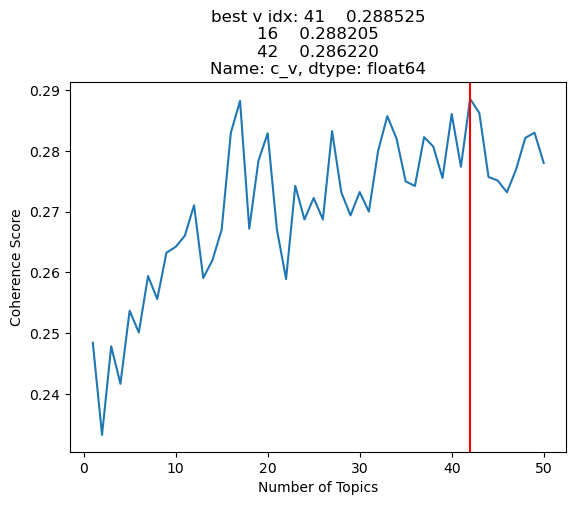

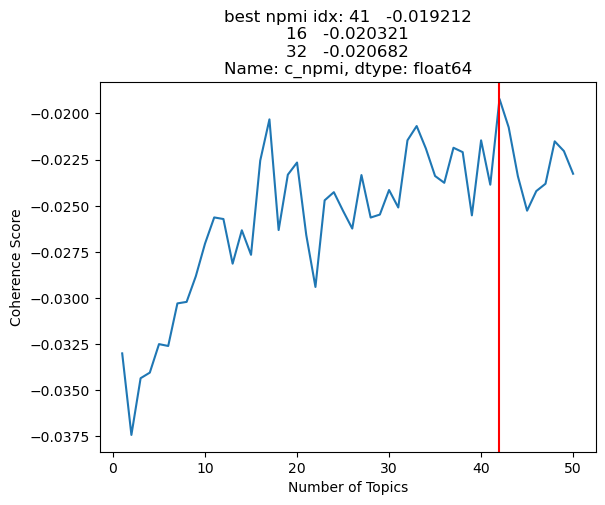

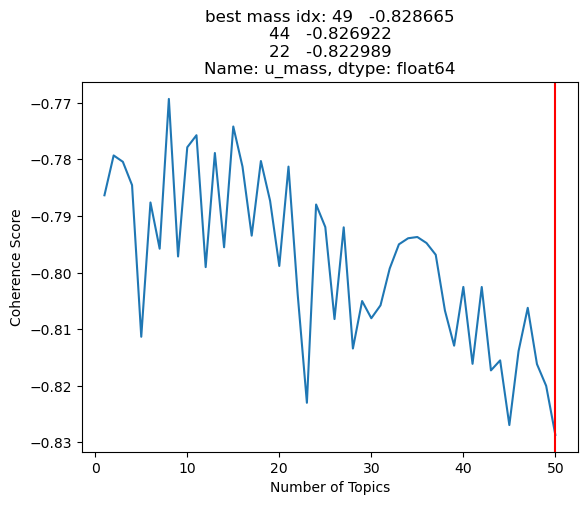

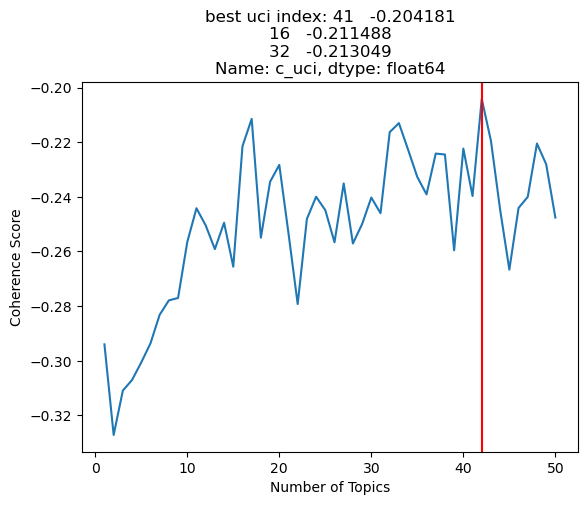

In [97]:
best_v = scores['c_v'].nlargest(3)

_=plt.plot(num_topics, list(scores['c_v']))
_=plt.axvline(x=scores['c_v'].idxmax()+1, color='r', linestyle='-')
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
_=plt.title(f'best v idx: {best_v}')
plt.show()

best_npmi = scores['c_npmi'].nlargest(3)

_=plt.plot(num_topics, list(scores['c_npmi']))
_=plt.axvline(x=scores['c_npmi'].idxmax()+1, color='r', linestyle='-')
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
_=plt.title(f'best npmi idx: {best_npmi}')
plt.show()

best_mass = scores['u_mass'].nsmallest(3)

_=plt.plot(num_topics, list(scores['u_mass']))
_=plt.axvline(x=scores['u_mass'].idxmin()+1, color='r', linestyle='-')
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
_=plt.title(f'best mass idx: {best_mass}')
plt.show()

best_uci = scores['c_uci'].nlargest(3)
                                
_=plt.plot(num_topics, list(scores['c_uci']))
_=plt.axvline(x=scores['c_uci'].idxmax()+1, color='r', linestyle='-')
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
_=plt.title(f'best uci index: {best_uci}')
plt.show()

In [99]:
models[41].print_topics(num_words=5)

[(22,
  '0.006*"right" + 0.005*"debate" + 0.004*"council" + 0.004*"human" + 0.004*"states"'),
 (13,
  '0.006*"europe" + 0.006*"right" + 0.005*"council" + 0.004*"epp" + 0.004*"include"'),
 (25,
  '0.016*"food" + 0.006*"rule" + 0.004*"right" + 0.004*"product" + 0.004*"policy"'),
 (21,
  '0.006*"president" + 0.006*"brussels" + 0.006*"agreement" + 0.006*"change" + 0.005*"epp"'),
 (17,
  '0.006*"market" + 0.005*"president" + 0.005*"council" + 0.005*"debate" + 0.005*"right"'),
 (38,
  '0.008*"president" + 0.007*"council" + 0.005*"debate" + 0.005*"market" + 0.005*"mr"'),
 (29,
  '0.009*"president" + 0.008*"epp" + 0.007*"debate" + 0.006*"mr" + 0.006*"brussels"'),
 (30,
  '0.008*"energy" + 0.006*"debate" + 0.005*"council" + 0.005*"states" + 0.005*"policy"'),
 (31,
  '0.006*"debate" + 0.005*"trade" + 0.005*"states" + 0.005*"europe" + 0.005*"council"'),
 (39,
  '0.007*"states" + 0.006*"market" + 0.005*"state" + 0.005*"election" + 0.005*"council"'),
 (7,
  '0.007*"council" + 0.006*"states" + 0.005

In [24]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [25]:
lda_display = pyLDAvis.gensim_models.prepare(models[max_topics - 1], corpus, dictionary)
pyLDAvis.display(lda_display)